# DATA PREPROCESSING

### Import the library

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

In [119]:
data=pd.read_csv('breast_cancer_survival.csv')

In [120]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [121]:
data.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [122]:
data = data.dropna()

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    int64  
 1   Gender              317 non-null    object 
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    object 
 7   Histology           317 non-null    object 
 8   ER status           317 non-null    object 
 9   PR status           317 non-null    object 
 10  HER2 status         317 non-null    object 
 11  Surgery_type        317 non-null    object 
 12  Date_of_Surgery     317 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      317 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.6+ K

In [124]:
print(data.Gender.value_counts())

FEMALE    313
MALE        4
Name: Gender, dtype: int64


#### Tumor stage count

In [125]:
count = data["Tumour_Stage"].value_counts()
print(count)

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64


In [126]:
stages=count.index
print(stages)
quantity=count.values
print(quantity)

Index(['II', 'III', 'I'], dtype='object')
[180  77  60]


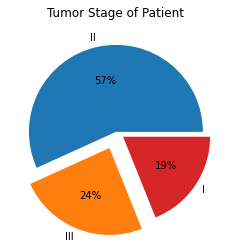

In [127]:
colors=['tab:blue','tab:orange','tab:red']
explode=[0,0.2,0.1]
fig, ax = py.subplots()
ax.pie(quantity, labels = stages, colors = colors, autopct='%.0f%%', explode = explode)
ax.set_title('Tumor Stage of Patient')
py.show()

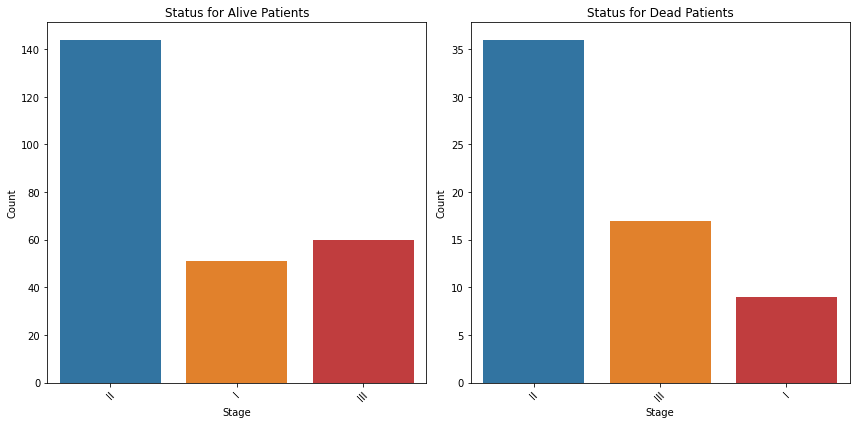

In [128]:
import seaborn as sns
# Filter the DataFrame for "Alive" and "Dead" status
alive_df = data[data['Patient_Status'] == 'Alive']
dead_df = data[data['Patient_Status'] == 'Dead']

# Create a bar chart for Marital Status for Alive status
py.figure(figsize=(12, 6))
py.subplot(1, 2, 1)  # Create a subplot for "Alive"

sns.countplot(data=alive_df, x='Tumour_Stage', palette=colors)
py.title('Status for Alive Patients')
py.xlabel('Stage')
py.ylabel('Count')
py.xticks(rotation=45)

py.subplot(1, 2, 2)
sns.countplot(data=dead_df, x='Tumour_Stage', palette=colors)
py.title('Status for Dead Patients')
py.xlabel('Stage')
py.ylabel('Count')
py.xticks(rotation=45)
py.tight_layout()  # Adjust subplot layout for better presentation
py.show()

#### Histology 

In [129]:
hist=data["Histology"].value_counts()
print(hist)

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64


In [130]:
types=hist.index
number=hist.values
print(types)
print(number)

Index(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'],
      dtype='object')
[224  81  12]


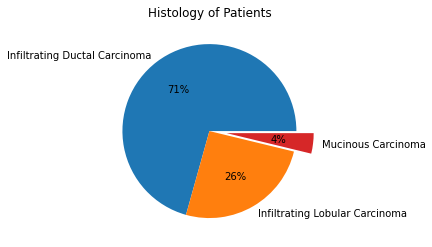

In [131]:
colors=['tab:blue','tab:orange','tab:red']
explode=[0,0,0.2]
fig, ax = py.subplots()
ax.pie(number, labels = types, colors = colors, autopct='%.0f%%', explode = explode)
ax.set_title('Histology of Patients')
py.show()

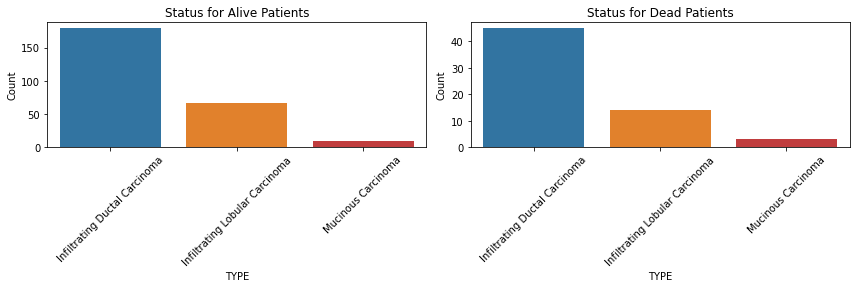

In [132]:
alive_df = data[data['Patient_Status'] == 'Alive']
dead_df = data[data['Patient_Status'] == 'Dead']

# Create a bar chart for Marital Status for Alive status
py.figure(figsize=(12, 6))
py.subplot(2, 2, 1)  # Create a subplot for "Alive"

sns.countplot(data=alive_df, x="Histology", palette=colors)
py.title('Status for Alive Patients')
py.xlabel('TYPE')
py.ylabel('Count')
py.xticks(rotation=45)

py.subplot(2, 2, 2)
sns.countplot(data=dead_df, x="Histology", palette=colors)
py.title('Status for Dead Patients')
py.xlabel('TYPE')
py.ylabel('Count')
py.xticks(rotation=45)
py.tight_layout()  # Adjust subplot layout for better presentation
py.show()

#### Status

In [133]:
print("ER status")
print(data["ER status"].value_counts())
print("PR status")
print(data["PR status"].value_counts())
print("HER2 status")
print(data["HER2 status"].value_counts())

ER status
Positive    317
Name: ER status, dtype: int64
PR status
Positive    317
Name: PR status, dtype: int64
HER2 status
Negative    288
Positive     29
Name: HER2 status, dtype: int64


In [134]:
surgery=data["Surgery_type"].value_counts()
print(surgery)

Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64


In [135]:
types=surgery.index
number=surgery.values
print(types)
print(number)

Index(['Other', 'Modified Radical Mastectomy', 'Lumpectomy',
       'Simple Mastectomy'],
      dtype='object')
[97 89 66 65]


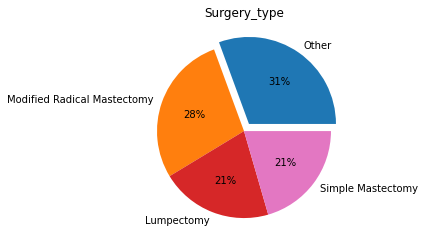

In [136]:
colors=['tab:blue','tab:orange','tab:red','tab:pink']
explode=[0.1,0,0,0]
fig, ax = py.subplots()
ax.pie(number, labels = types, colors = colors, autopct='%.0f%%', explode = explode)
ax.set_title('Surgery_type')
py.show()

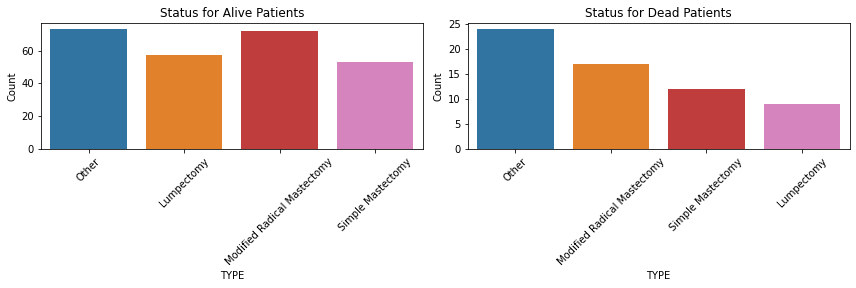

In [137]:
alive_df = data[data['Patient_Status'] == 'Alive']
dead_df = data[data['Patient_Status'] == 'Dead']

# Create a bar chart for Marital Status for Alive status
py.figure(figsize=(12, 6))
py.subplot(2, 2, 1)  # Create a subplot for "Alive"

sns.countplot(data=alive_df, x='Surgery_type', palette=colors)
py.title('Status for Alive Patients')
py.xlabel('TYPE')
py.ylabel('Count')
py.xticks(rotation=45)

py.subplot(2, 2, 2)
sns.countplot(data=dead_df, x='Surgery_type', palette=colors)
py.title('Status for Dead Patients')
py.xlabel('TYPE')
py.ylabel('Count')
py.xticks(rotation=45)
py.tight_layout()  # Adjust subplot layout for better presentation
py.show()

In [138]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data["ER status"] = data["ER status"].map({"Positive": 1})
data["PR status"] = data["PR status"].map({"Positive": 1})
data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})
data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})
data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,1,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,2,1,20-May-18,26-Aug-18,Alive
1,54,1,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,2,1,26-Apr-18,25-Jan-19,Dead
2,63,1,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,2,3,24-Aug-18,08-Apr-20,Alive
3,78,1,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,2,1,16-Nov-18,28-Jul-20,Alive
4,42,1,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,3,12-Dec-18,05-Jan-19,Alive


### Spliting of Data

In [139]:
x = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']])
y = np.array(data[['Patient_Status']])

In [140]:
print(x)

[[42.       1.       0.95256 ...  1.       2.       1.     ]
 [54.       1.       0.      ...  1.       2.       1.     ]
 [63.       1.      -0.52303 ...  1.       2.       3.     ]
 ...
 [54.       1.       0.75382 ...  1.       2.       4.     ]
 [74.       1.       0.97251 ...  1.       2.       3.     ]
 [66.       1.       0.28638 ...  1.       2.       2.     ]]


In [141]:
print(y)

[['Alive']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Dead']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Dead']
 ['Dead']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Dead']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Dead']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 ['Alive']
 

## Spliting of data into Training and Testing model

In [142]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

In [143]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=2)
yest=KM.fit_predict(xtest)

In [144]:
print(yest)
print(yest.shape)

[1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1]
(64,)


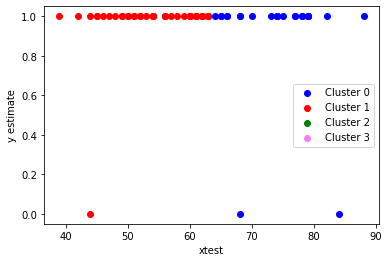

In [145]:
py.scatter(xtest[yest==0,0],xtest[yest==0,1],c='blue',label='Cluster 0')
py.scatter(xtest[yest==1,0],xtest[yest==1,1],c='red',label='Cluster 1')
py.scatter(xtest[yest==2,0],xtest[yest==2,1],c='green',label='Cluster 2')
py.scatter(xtest[yest==3,0],xtest[yest==3,1],c='violet',label='Cluster 3')
py.legend()
py.xlabel('xtest')
py.ylabel('y estimate')
py.show()

## Gausaian Naive Baye's

In [146]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(xtrain,ytrain)

C:\Users\Akansha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [147]:
ypredict=NB.predict(xtest)
print(np.concatenate((ypredict.reshape(len(ypredict),1),ytest.reshape(len(ytest),1)),1))

[['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Dead']
 ['Dead' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Alive' 'Alive']
 ['Dead' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Alive' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Alive' 'Alive']
 ['Dead' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Alive' 'Alive']
 ['Dead' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Dead']
 ['Dead' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Dead']
 ['Dead' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Dead']
 ['Alive' 'Dead']
 ['Dead' 'Alive']
 ['Alive' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Dead' 'Alive']
 ['Alive' 'Dead']
 ['Dead' 'Alive']
 ['Dead' 'Alive']

In [148]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
print(confusion_matrix(ytest,ypredict))
print(accuracy_score(ytest,ypredict))
print(precision_score(ytest,ypredict,pos_label='Dead'))

[[ 7 43]
 [ 3 11]]
0.28125
0.2037037037037037


In [149]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ytest_numeric = label_encoder.fit_transform(ytest)
print(ytest_numeric)
ypredict_numeric = label_encoder.transform(ypredict)
print(f'y predict {ypredict_numeric}')

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
y predict [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0]


C:\Users\Akansha\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
from sklearn.metrics import mean_absolute_error,f1_score,mean_squared_error,recall_score
mean_absolute_error(ytest_numeric,ypredict_numeric)
mean_squared_error(ytest_numeric,ypredict_numeric)
f1_score(ytest_numeric,ypredict_numeric)
print(f'mean absolute error is ={mean_absolute_error(ytest_numeric,ypredict_numeric)}')
print(f'mean squared error is ={mean_squared_error(ytest_numeric,ypredict_numeric)}')
print(f'f1 score is ={f1_score(ytest_numeric,ypredict_numeric)}')
print(f'mean squared root error ={np.sqrt(mean_squared_error(ytest_numeric,ypredict_numeric))}')
print(f'recall score ={NB.score(xtest,ypredict_numeric)}')

mean absolute error is =0.71875
mean squared error is =0.71875
f1 score is =0.32352941176470584
mean squared root error =0.8477912478906585
recall score =0.0


C:\Users\Akansha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\2380919285.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\2380919285.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


Confusion matrix:
 [[ 7 43]
 [ 3 11]]


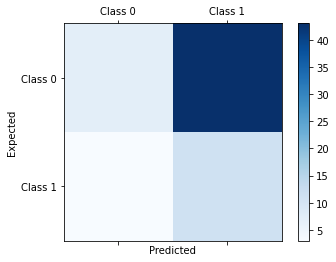

In [178]:
conf_mat = confusion_matrix(y_true=ytest_numeric, y_pred=ypredict_numeric)
labels = ['Class 0', 'Class 1']
fig = py.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=py.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
py.xlabel('Predicted')
py.ylabel('Expected')
print('Confusion matrix:\n', conf_mat)
py.show()

In [152]:
print(f'training score {NB.score(xtrain,ytrain)}')
print(f'test score {NB.score(xtest,ytest)}')

training score 0.2648221343873518
test score 0.28125


## Logistic regression

In [153]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(xtrain,ytrain)
ypredict=lor.predict(xtest)
print(np.concatenate((ypredict.reshape(len(ypredict),1),ytest.reshape(len(ytest),1)),1))

[['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Dead']
 ['Alive' 'Dead']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Alive' 'Alive']
 ['Ali

C:\Users\Akansha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akansha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,mean_absolute_error,f1_score,mean_squared_error,recall_score
print(confusion_matrix(ytest,ypredict))
print(accuracy_score(ytest,ypredict))
print(precision_score(ytest,ypredict,pos_label='Alive'))
ypredict2_numeric = label_encoder.transform(ypredict)
mean_absolute_error(ytest_numeric,ypredict2_numeric)
mean_squared_error(ytest_numeric,ypredict2_numeric)
f1_score(ytest_numeric,ypredict_numeric)
print(f'mean absolute error is ={mean_absolute_error(ytest_numeric,ypredict2_numeric)}')
print(f'mean squared error is ={mean_squared_error(ytest_numeric,ypredict2_numeric)}')
print(f'f1 score is ={f1_score(ytest_numeric,ypredict2_numeric)}')
print(f'mean squared root error ={np.sqrt(mean_squared_error(ytest_numeric,ypredict2_numeric))}')
print(f'recall score ={lor.score(xtest,ypredict)}')

[[50  0]
 [14  0]]
0.78125
0.78125
mean absolute error is =0.21875
mean squared error is =0.21875
f1 score is =0.0
mean squared root error =0.46770717334674267
recall score =1.0


C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\1974367633.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\1974367633.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


Confusion matrix:
 [[50  0]
 [14  0]]


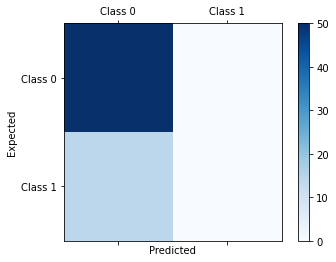

In [177]:
conf_mat = confusion_matrix(y_true=ytest_numeric, y_pred=ypredict2_numeric)
labels = ['Class 0', 'Class 1']
fig = py.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=py.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
py.xlabel('Predicted')
py.ylabel('Expected')
print('Confusion matrix:\n', conf_mat)
py.show()

In [156]:
print(f'training score for logistic Resgression {lor.score(xtrain,ytrain)}')
print(f'test score  for logistic Resgression {lor.score(xtest,ytest)}')

training score for logistic Resgression 0.8102766798418972
test score  for logistic Resgression 0.78125


## Decision tree

In [157]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [158]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [159]:
yes_dt=dt.predict(xtest)
print(yes_dt)

['Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Dead' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive']


In [160]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,mean_absolute_error,f1_score,mean_squared_error,recall_score
print(confusion_matrix(ytest,yes_dt))
print(accuracy_score(ytest,yes_dt))
print(precision_score(ytest,yes_dt,pos_label='Alive'))
yes_numeric = label_encoder.transform(yes_dt)
mean_absolute_error(ytest_numeric,yes_numeric)
mean_squared_error(ytest_numeric,yes_numeric)
f1_score(ytest_numeric,yes_numeric)
print(f'mean absolute error is ={mean_absolute_error(ytest_numeric,yes_numeric)}')
print(f'mean squared error is ={mean_squared_error(ytest_numeric,yes_numeric)}')
print(f'f1 score is ={f1_score(ytest_numeric,yes_numeric)}')
print(f'mean squared root error ={np.sqrt(mean_squared_error(ytest_numeric,yes_numeric))}')
print(f'recall score ={lor.score(xtest,yes_dt)}')

[[49  1]
 [14  0]]
0.765625
0.7777777777777778
mean absolute error is =0.234375
mean squared error is =0.234375
f1 score is =0.0
mean squared root error =0.4841229182759271
recall score =0.984375


Confusion matrix:
 [[49  1]
 [14  0]]


C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\2584299627.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\2584299627.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


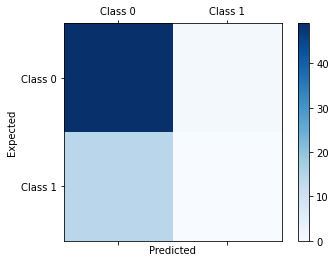

In [179]:
conf_mat = confusion_matrix(y_true=ytest_numeric, y_pred=yes_numeric)
labels = ['Class 0', 'Class 1']
fig = py.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=py.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
py.xlabel('Predicted')
py.ylabel('Expected')
print('Confusion matrix:\n', conf_mat)
py.show()

In [162]:
print(f'training score for decision tree {dt.score(xtrain,ytrain)}')
print(f'test score  for decision tree {dt.score(xtest,ytest)}')

training score for decision tree 0.8181818181818182
test score  for decision tree 0.765625


## Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=700,criterion='entropy')

In [164]:
rf.fit(xtrain,ytrain)

C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\2224009558.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier(criterion='entropy', n_estimators=700)

In [165]:
yest_rf=rf.predict(xtest)
print(yest_rf)

['Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive']


In [166]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,mean_absolute_error,f1_score,mean_squared_error,recall_score
print(confusion_matrix(ytest,yest_rf))
print(accuracy_score(ytest,yest_rf))
print(precision_score(ytest,yest_rf,pos_label='Alive'))
yest_numeric = label_encoder.transform(yest_rf)
mean_absolute_error(ytest_numeric,yest_numeric)
mean_squared_error(ytest_numeric,yest_numeric)
f1_score(ytest_numeric,yest_numeric)
print(f'mean absolute error is ={mean_absolute_error(ytest_numeric,yest_numeric)}')
print(f'mean squared error is ={mean_squared_error(ytest_numeric,yest_numeric)}')
print(f'f1 score is ={f1_score(ytest_numeric,yest_numeric)}')
print(f'mean squared root error ={np.sqrt(mean_squared_error(ytest_numeric,yest_numeric))}')
print(f'recall score ={rf.score(xtest,yest_rf)}')

[[50  0]
 [14  0]]
0.78125
0.78125
mean absolute error is =0.21875
mean squared error is =0.21875
f1 score is =0.0
mean squared root error =0.46770717334674267
recall score =1.0


C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\136150065.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\136150065.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


Confusion matrix:
 [[50  0]
 [14  0]]


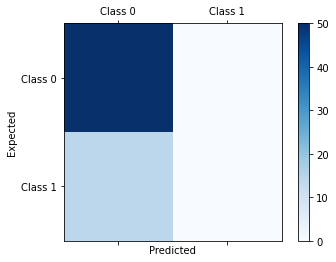

In [175]:
conf_mat = confusion_matrix(y_true=ytest_numeric, y_pred=yest_numeric)
labels = ['Class 0', 'Class 1']
fig = py.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=py.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
py.xlabel('Predicted')
py.ylabel('Expected')
print('Confusion matrix:\n', conf_mat)
py.show()

In [168]:
print(f'training score for Random Forest {rf.score(xtrain,ytrain)}')
print(f'test score  for Random Forest {rf.score(xtest,ytest)}')

training score for Random Forest 1.0
test score  for Random Forest 0.78125


## KNearest-Neighbour

In [169]:
from sklearn.neighbors import KNeighborsClassifier
KC=KNeighborsClassifier(n_neighbors=5)
KC.fit(xtrain,ytrain)

C:\Users\Akansha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [170]:
yest_knn=KC.predict(xtest)
print(yest_knn)

['Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Dead' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive']


In [171]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,mean_absolute_error,f1_score,mean_squared_error,recall_score
print(confusion_matrix(ytest,yest_knn))
print(accuracy_score(ytest,yest_knn))
print(precision_score(ytest,yest_knn,pos_label='Alive'))
yestk_numeric = label_encoder.transform(yest_knn)
mean_absolute_error(ytest_numeric,yestk_numeric)
mean_squared_error(ytest_numeric,yestk_numeric)
f1_score(ytest_numeric,yestk_numeric)
print(f'mean absolute error is ={mean_absolute_error(ytest_numeric,yestk_numeric)}')
print(f'mean squared error is ={mean_squared_error(ytest_numeric,yestk_numeric)}')
print(f'f1 score is ={f1_score(ytest_numeric,yestk_numeric)}')
print(f'mean squared root error ={np.sqrt(mean_squared_error(ytest_numeric,yestk_numeric))}')
print(f'recall score ={KC.score(xtest,yest_knn)}')
print(f'training score {KC.score(xtrain,ytrain)}')
print(f'test score {KC.score(xtest,ytest)}')

[[50  0]
 [13  1]]
0.796875
0.7936507936507936
mean absolute error is =0.203125
mean squared error is =0.203125
f1 score is =0.13333333333333333
mean squared root error =0.45069390943299864
recall score =1.0
training score 0.8181818181818182
test score 0.796875


C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\2880051717.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Akansha\AppData\Local\Temp\ipykernel_29668\2880051717.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


Confusion matrix:
 [[50  0]
 [13  1]]


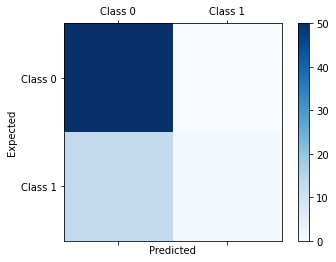

In [172]:
conf_mat = confusion_matrix(y_true=ytest_numeric, y_pred=yestk_numeric)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = py.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=py.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
py.xlabel('Predicted')
py.ylabel('Expected')
py.show()

## Comparision between Models

In [173]:
models = ['Naive Bayes', 'Lgistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

metrics = {
    'Model': models,
    'Accuracy': [accuracy_score(ytest_numeric, y_pred) for y_pred in [ypredict_numeric,ypredict2_numeric, yes_numeric,yest_numeric,yestk_numeric]],
    'F1 Score': [f1_score(ytest_numeric, y_pred) for y_pred in[ypredict_numeric,ypredict2_numeric, yes_numeric,yest_numeric,yestk_numeric]],
    'Recall': [recall_score(ytest_numeric, y_pred) for y_pred in [ypredict_numeric,ypredict2_numeric, yes_numeric,yest_numeric,yestk_numeric]],
    'Precision': [precision_score(ytest_numeric, y_pred) for y_pred in [ypredict_numeric,ypredict2_numeric, yes_numeric,yest_numeric,yestk_numeric]]
}

# Create a DataFrame from the metrics dictionary
df_metrics = pd.DataFrame(metrics)
df_metrics

C:\Users\Akansha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akansha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,F1 Score,Recall,Precision
0,Naive Bayes,0.281250,0.323529,0.785714,0.203704
1,Lgistic Regression,0.781250,0.000000,0.000000,0.000000
2,Decision Tree,0.765625,0.000000,0.000000,0.000000
3,Random Forest,0.781250,0.000000,0.000000,0.000000
4,KNN,0.796875,0.133333,0.071429,1.000000


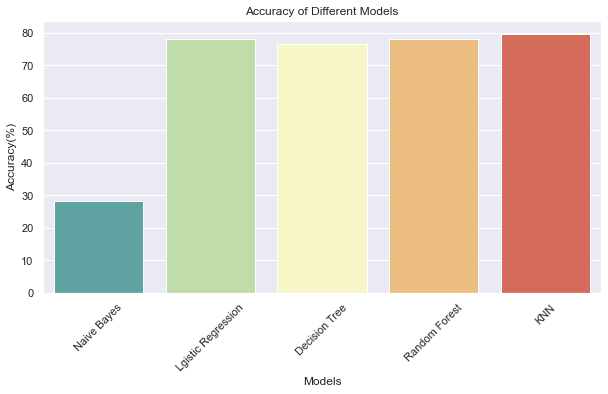

The model with the maximum Accuracy is: KNN


In [182]:
import seaborn as sns
Models = pd.DataFrame({
    'Models': ['Naive Bayes', 'Lgistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [accuracy_score(ytest_numeric, y_pred)*100 for y_pred in [ypredict_numeric,ypredict2_numeric, yes_numeric,yest_numeric,yestk_numeric]]
})
py.figure(figsize=(10, 5))
sns.set()
sns.barplot(x='Models', y='Accuracy', data=Models, palette="Spectral_r")
py.xlabel('Models')
py.ylabel('Accuracy(%)')
py.title('Accuracy of Different Models')
py.xticks(rotation=45)
py.show()

max_accuracy = Models.loc[Models['Accuracy'].idxmax(), 'Models']
print(f"The model with the maximum Accuracy is: {max_accuracy}")

## Prediction

In [174]:
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage',
#'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]

features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(KC.predict(features))

['Alive']
